In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Bulk Free Energy Density   
c can either be c or \$ \phi \$
\begin{equation}
f_{bulk} = f_0 c^{2} (1-c)^{2}
\end{equation}

In [2]:
def calc_f_bulk(c : float, c1 = 0., c2 =1, f_0=1.) -> float:
    return f_0 * (c1 - c)**2 *(c - c2)**2

def calc_df_bulk(c : float, c1 = 0., c2 =1, f_0=1.) -> float:
    return -2*f_0 * (c1 - c) *(c - c2)**2 + 2*f_0 * (c1 - c)**2 *(c - c2)
    

# Generic two well potential

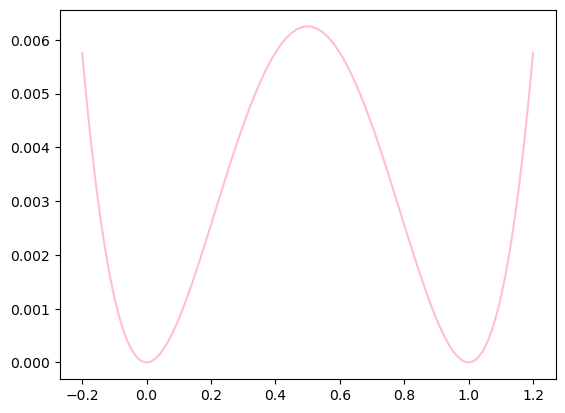

In [3]:
c = np.linspace(-0.2,1.2,100)
f_bulk = [calc_f_bulk(c_i, f_0=0.1) for c_i in c]

fig, ax = plt.subplots()
ax.plot(c, f_bulk, 'pink')

0.1975


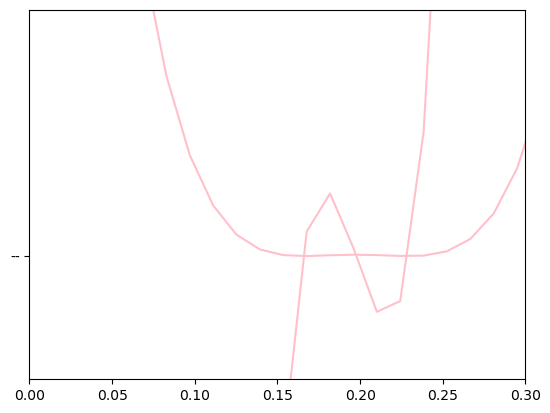

In [20]:
c = np.linspace(-0.2,1.2,100)
c1 = 0.165
c2 = 0.23

f_bulk = [calc_f_bulk(c_i,c1 = 0.165, c2 = 0.23, f_0=1.) for c_i in c]
df_bulk = [calc_df_bulk(c_i, c1 = 0.165, c2 = 0.23, f_0=1.) for c_i in c]
fig, ax = plt.subplots()
ax.plot(c, f_bulk, 'pink')
ax.plot(c, df_bulk, 'pink', '--')
ax.set_ylim(-0.0001, 0.0002)
ax.set_xlim(0, 0.3)

fit_calc_df_bulk = lambda c: calc_df_bulk(c, c1 = 0.165, c2 = 0.23, f_0=1.)
c_max = sp.optimize.root_scalar(fit_calc_df_bulk, x0=0.2).root
print(c_max)

In [35]:
delta_f = 149 #J/mol
def calc_f0(delta_f, c_max, c1 = 0.165, c2 = 0.23, f_0=1.):
    return delta_f/((c1 - c_max)**2 *(c_max - c2)**2)

f_0_calc = calc_f0(delta_f=delta_f, c_max = c_max, c1 = 0.165, c2 = 0.23, f_0 = 1.)

f_0_calc


    

133552746.75256467

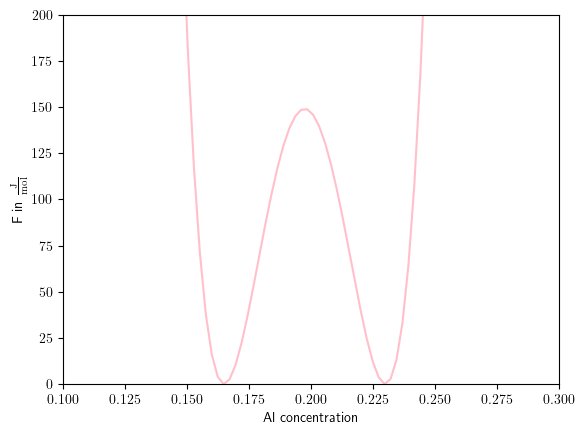

In [54]:
c = np.linspace(0.1,2.5,1000)
f_bulk = [calc_f_bulk(c_i, c1 = 0.165, c2 = 0.23, f_0=f_0_calc) for c_i in c]
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
ax.plot(c, f_bulk, 'pink')
ax.set_ylim(0, 200)
ax.set_xlim(0.1, 0.3)
ax.set_xlabel(r'Al concentration')
ax.set_ylabel(r'F in $\frac{\mathrm{J}}{\mathrm{mol}}$')
plt.savefig('../report/graphics/alni_fitted.png')
